# Which Classifier Should I Choose? 

This is one of the most import questions to ask when approaching a machine learning problem. I find it easier to just test them all at once. Here's 10 of your favorite Scikit-Learn algorithms applied to the leaf data. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv(r"C:\Users\Electonics\OneDrive\Desktop\mphil_research\texture\train.csv")
test = pd.read_csv(r"C:\Users\Electonics\OneDrive\Desktop\mphil_research\texture\test.csv")

In [2]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Data Preparation


In [3]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
   #train = train.drop(['species', 'id'], axis=1)
    train = train.iloc[:,130:196]
    #test = test.drop(['id'], axis=1)
    test = test.iloc[:,129:196]
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head()

,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.000000,0.000000,0.007812,0.079102,0.000000,0.039062,0.000977,0.000000,0.027344,0.003906,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.003906,0.047852,0.008789,0.000000,0.097656,0.005859,0.003906,0.101560,0.032227,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.023438,0.000977,0.007812,0.020508,0.000000,0.000000,0.013672,0.004883,0.006836,0.095703,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.039062,0.036133,0.003906,0.003906,0.046875,0.000000,0.041016,0.041016,0.000000,0.010742,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
test.head()

,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.112310,0.013672,0.011719,0.004883,0.010742,0.022461,0.055664,0.028320,0.040039,0.008789,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.057617,0.004883,0.006836,0.005859,0.000977,0.010742,0.052734,0.009766,0.022461,0.041016,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.013672,0.000000,0.000000,0.000977,0.055664,0.000000,0.050781,0.005859,0.000000,0.010742,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.002930,0.000977,0.001953,0.023438,0.010742,0.000000,0.019531,0.008789,0.001953,0.009766,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.000977,0.007812,0.005859,0.009766,0.000000,0.003906,0.018555,0.009766,0.003906,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


## Stratified Train/Test Split

Stratification is necessary for this dataset because there is a relatively large number of classes (100 classes for 990 samples). This will ensure we have all classes represented in both the train and test indices. 

In [5]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Sklearn Classifier Showdown

Simply looping through 10 out-of-the box classifiers and printing the results. Obviously, these will perform much better after tuning their hyperparameters, but this gives you a decent ballpark idea. 

In [6]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    LinearDiscriminantAnalysis(),
    NuSVC(probability=True),
    SVC(kernel="rbf", C=0.025, probability=True),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #RandomForestClassifier(),
    #AdaBoostClassifier(),
    # QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


LinearDiscriminantAnalysis
****Results****
Accuracy: 74.7475%
Log Loss: 2.383171812495384
NuSVC
****Results****
Accuracy: 79.2929%
Log Loss: 2.4061195117800636
SVC
****Results****
Accuracy: 70.7071%
Log Loss: 4.755828426489475
KNeighborsClassifier
****Results****
Accuracy: 76.2626%
Log Loss: 4.123134048583386
DecisionTreeClassifier
****Results****
Accuracy: 47.9798%
Log Loss: 17.967141255938483
GradientBoostingClassifier
****Results****
Accuracy: 50.5051%
Log Loss: 3.2592257163085705
GaussianNB
****Results****
Accuracy: 55.5556%
Log Loss: 13.523971851008323


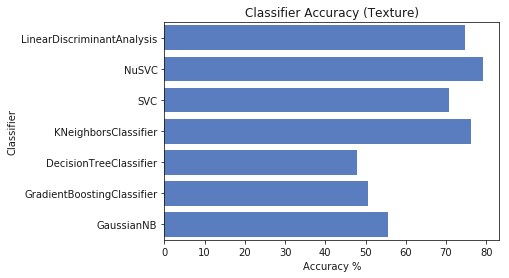

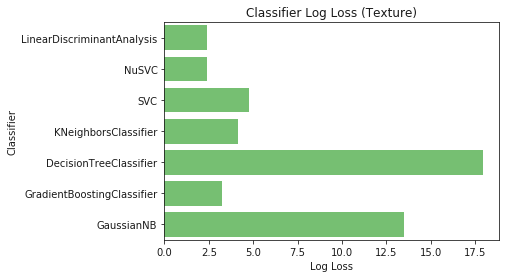

In [7]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy (Texture)')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss (Texture)')
plt.show()

**##Random search for optimal hyperparameters of the SVM classifier**

In [8]:
import scipy
from sklearn.grid_search import RandomizedSearchCV
clf = SVC(probability=True, random_state=1)
param_grid = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}
rand_search = RandomizedSearchCV(clf, param_distributions = param_grid, n_iter = 20) 
rand_search.fit(X_train,y_train) 
rand_search.best_params_

{'C': 6.615077858844323,
 'class_weight': 'balanced',
 'gamma': 0.017200751307512845,
 'kernel': 'rbf'}

In [9]:
predr = rand_search.predict(X_test)
print("Accuracy: {:.4%}".format(accuracy_score(y_test,predr)))

Accuracy: 82.8283%


Hyperparameter tuning gives us an accuracy boost of over 1%!!!

## Submission

After choosing your favorite classifier, format the output for a leaderboard submission. 

In [10]:
# Predict Test Set
favorite_clf = SVC(C=13.450385695977566, class_weight='balanced', gamma=0.0043155380191205834,
 kernel='rbf',probability = True, random_state=1)
favorite_clf.fit(X_train, y_train)
test_predictions = favorite_clf.predict_proba(test)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

# Export Submission
#submission.to_csv('submission.csv', index = False)
submission.tail()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
589,1576,0.006220,0.016761,0.009014,0.014023,0.004365,0.013054,0.009351,0.003598,0.013008,...,0.008570,0.004822,0.002758,0.005317,0.012697,0.010060,0.004944,0.009804,0.003189,0.011517
590,1577,0.006061,0.016088,0.008424,0.014017,0.004036,0.012580,0.009503,0.003612,0.012653,...,0.008771,0.004837,0.002782,0.005353,0.013442,0.010556,0.005105,0.009948,0.003235,0.011416
591,1579,0.006456,0.015616,0.008801,0.013632,0.004152,0.013408,0.009309,0.003572,0.012553,...,0.008641,0.004884,0.002731,0.005341,0.012607,0.009686,0.004879,0.010061,0.003184,0.010893
592,1580,0.006070,0.015188,0.008857,0.014409,0.004010,0.012689,0.009424,0.003899,0.012167,...,0.008851,0.004872,0.002728,0.005621,0.012463,0.010348,0.004863,0.009820,0.003178,0.010950
593,1583,0.006061,0.016321,0.008877,0.013813,0.004026,0.013168,0.009677,0.003614,0.012794,...,0.008591,0.004862,0.002734,0.005353,0.012664,0.010465,0.004913,0.009654,0.003168,0.011573
